In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for better readability
sns.set(style="whitegrid")

# Using encoding='latin-1' to handle special characters if default utf-8 fails
file_path = r"C:\Users\asus\OneDrive\Desktop\miniproject-1\laptop_price - dataset.csv"
try:
    df = pd.read_csv(file_path, encoding='latin-1')
except:
    df = pd.read_csv(file_path)

print("Dataset loaded successfully.")
print(f"Dataset shape: {df.shape}")
print("First 5 rows of the dataset:")
print(df.head())
# Display basic information about the dataset
print("\nDataset Info:")
df.info()
print("\nStatistical Summary:")
print(df.describe(include='all'))
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Dataset loaded successfully.
Dataset shape: (1275, 15)
First 5 rows of the dataset:
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                

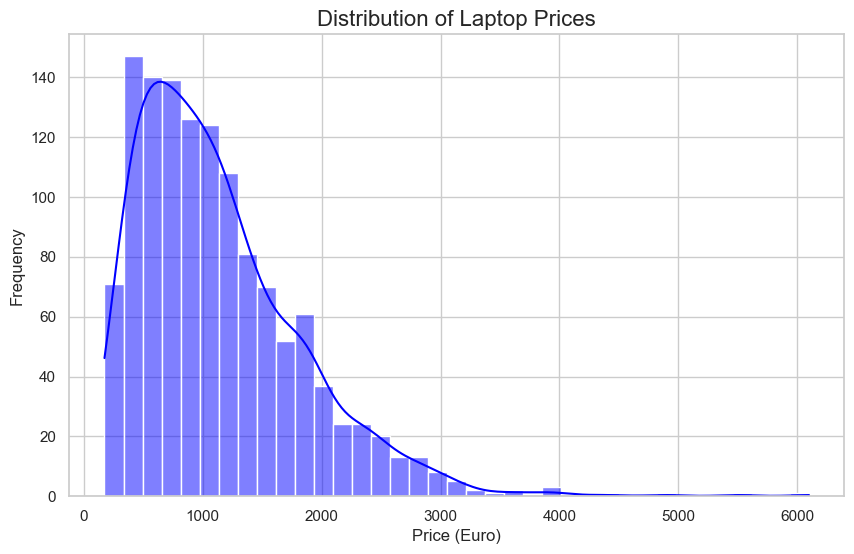

In [2]:
# Task 1: Plot the price of all laptops (Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'], kde=True, color='blue')
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price (Euro)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('price_distribution.png') # שמירת הגרף
plt.show()

In [3]:
# Task 2: Most expensive company (on average) & Average price per company
# Calculate mean price by company and sort descending
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

print("\n--- Average Price per Company ---")
print(avg_price_by_company)

most_expensive_company = avg_price_by_company.idxmax()
print(f"\nThe company with the most expensive laptops on average is: {most_expensive_company}")


--- Average Price per Company ---
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the most expensive laptops on average is: Razer


In [4]:
# Task 3 + 4: Fix and standardize Operating System (OpSys) names
print("\nUnique OpSys before fix:", df['OpSys'].unique())

def set_os_category(os_name):
    """
    פונקציה לאיחוד שמות של מערכות הפעלה דומות
    """
    if 'Windows' in os_name:
        return 'Windows'
    elif 'Mac' in os_name or 'macOS' in os_name:
        return 'Mac'
    elif 'Linux' in os_name:
        return 'Linux'
    elif 'Android' in os_name:
        return 'Android'
    elif 'Chrome' in os_name:
        return 'Chrome OS'
    else:
        return 'No OS/Other'

df['OpSys'] = df['OpSys'].apply(set_os_category)
print("Unique OpSys after fix:", df['OpSys'].unique())


Unique OpSys before fix: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Unique OpSys after fix: ['Mac' 'No OS/Other' 'Windows' 'Linux' 'Android' 'Chrome OS']


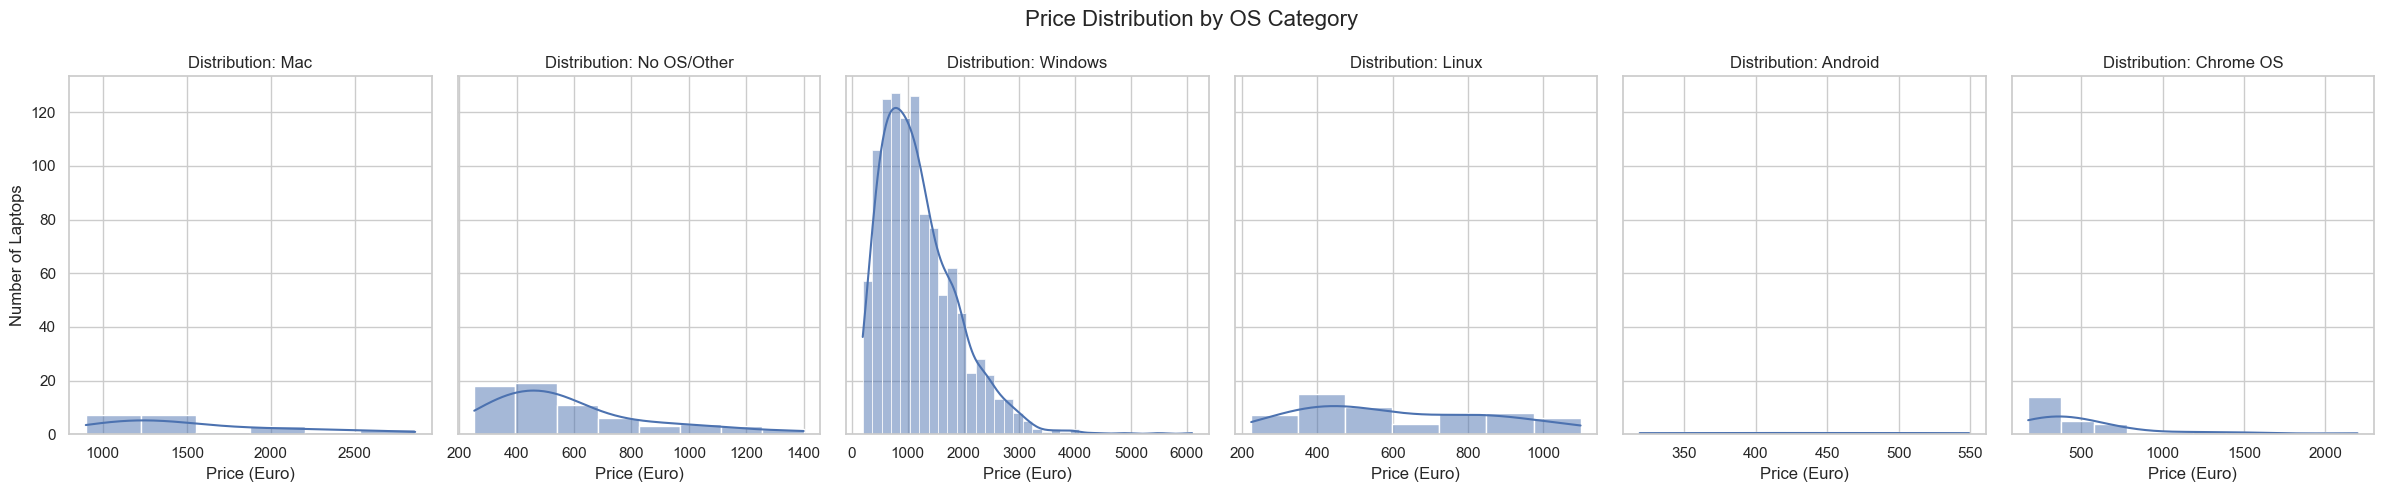

In [5]:
# Task 5: Plot price distribution for each Operating System type (Fixed Layout)

unique_os = df['OpSys'].unique()

# Change to 1 row, multiple columns, and SHARE the Y-axis
fig, axes = plt.subplots(nrows=1, ncols=len(unique_os), figsize=(24, 5), sharey=True)

for i, os in enumerate(unique_os):
    subset = df[df['OpSys'] == os]
    
    # Plot histogram with KDE
    # We turn off the y-label for all but the first graph to reduce clutter
    sns.histplot(subset['Price (Euro)'], ax=axes[i], kde=True)
    
    axes[i].set_title(f'Distribution: {os}')
    axes[i].set_xlabel('Price (Euro)')
    
    # Only show Y label on the very first graph
    if i == 0:
        axes[i].set_ylabel('Number of Laptops')
    else:
        axes[i].set_ylabel('')

plt.suptitle('Price Distribution by OS Category', fontsize=16)
plt.tight_layout()
plt.savefig('opsys_distribution_row.png')
plt.show()


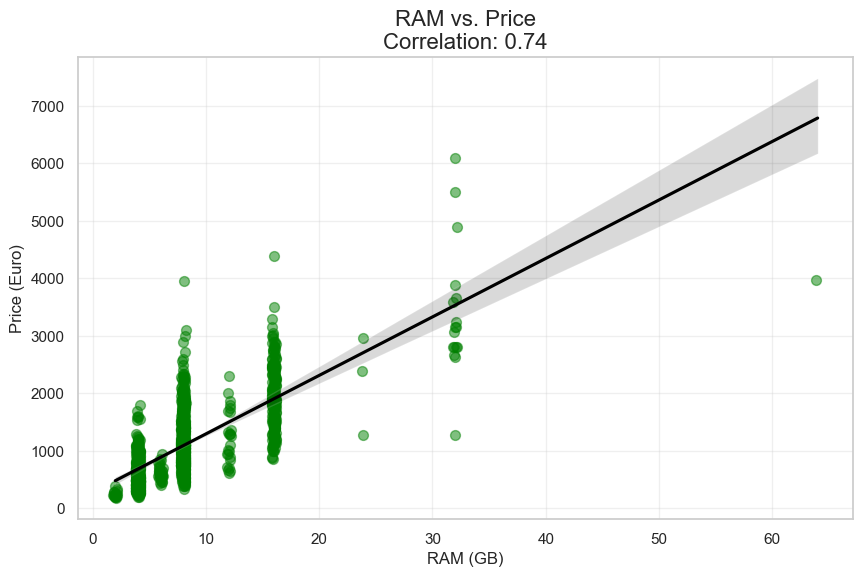

In [ ]:
# Task 6: Relationship between RAM and Price

correlation = df['RAM (GB)'].corr(df['Price (Euro)'])

# 2. Setup the Plot
plt.figure(figsize=(10, 6))

# 3. Create the Regression Plot
# x_jitter=0.2 adds the horizontal noise to separate points like in the image
sns.regplot(
    x='RAM (GB)', 
    y='Price (Euro)', 
    data=df, 
    x_jitter=0.2,  
    scatter_kws={'color': 'green', 'alpha': 0.5, 's': 50},  # Green, semi-transparent dots
    line_kws={'color': 'black'}  # Black regression line
)

# 4. Styling
plt.title(f'RAM vs. Price\nCorrelation: {correlation:.2f}', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True, alpha=0.3)  # Light grid
plt.savefig('ram_vs_price_regplot.png')
plt.show()

In [7]:
# Task 7: Create a new column 'Storage Type' based on 'Memory' column
def extract_storage_type(memory_str):
    """
    Extracts the storage type (SSD, HDD, Flash Storage, Hybrid) from the Memory column string.
    If multiple types exist (e.g., '128GB SSD + 1TB HDD'), it returns both joined by ' + '.
    """
    storage_types = []
    if 'SSD' in memory_str:
        storage_types.append('SSD')
    if 'HDD' in memory_str:
        storage_types.append('HDD')
    if 'Flash Storage' in memory_str:
        storage_types.append('Flash Storage')
    if 'Hybrid' in memory_str:
        storage_types.append('Hybrid')
    
    if not storage_types:
        return 'Unknown'
    
    return ' + '.join(storage_types)

df['Storage Type'] = df['Memory'].apply(extract_storage_type)

print("\nFirst 5 rows with new 'Storage Type' column:")
print(df[['Memory', 'Storage Type']].head())


First 5 rows with new 'Storage Type' column:
                Memory   Storage Type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
